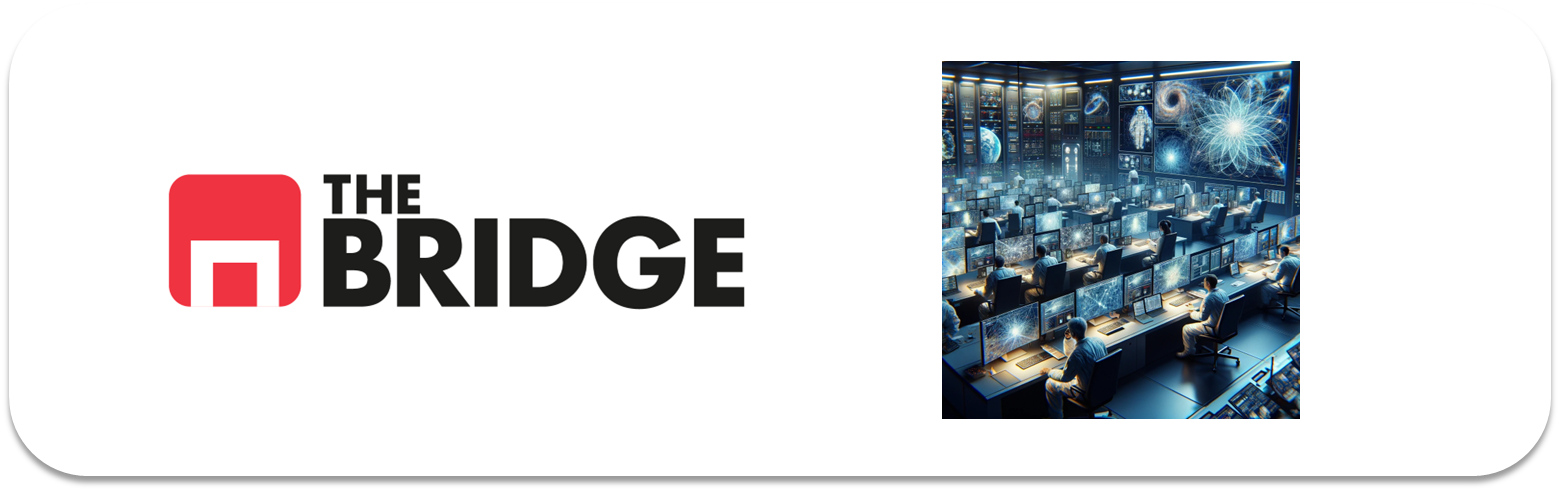

## PRACTICA OBLIGATORIA: **Redes Convolucionales**

* La práctica obligatoria de esta unidad consiste en un ejercicio de construcción de una red convolucional con Keras para la clasificación de imagenes de simpáticos perretes y gatetes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

### Problema de Negocio y dataset

Una conocida empresa de información inmobiliaria utiliza un CAPTCHA visual de perros y gatos para detectar webscrappings intensivos y ataques de denegación de servicio. Últimamente, ha detectado que su sistema está empezando a flojear, es decir que hay muchos sistemas de detección automática de imágenes que son capaces de detectar que es un perro y un gato y salterse el CAPTCHA antirobots. Por eso nos ha pedido que entrenemos un modelo potente de clasificación que emule a estos sistemas con el objetivo de emplear como fotografías para el CAPTCHA aquellas que no sepa detectar este sistema emulador de chicos malos.  

Pues manos a la obra, tenemos que seleccionar en un conjunto de 1000 imágenes aquellas que peor se le daría clasificar a un potencial sistema anti-CAPTCHA.  

Para ello vamos a emplear un conjunto de train de 4000 imágenes de perretes y gatetes que se encuentran distribuidas en "data" en cuatro directorios "github_train_0",  "github_train_1", "githun_train_2" y "github_train_3". Los datos de las imagenes que tenemos que clasificar y luego seleccionar como las más "difíciles" están en "data" en el directorio "github_test".


### Se pide

1. Crear los datasets X,y de train y test, leyendo las imágenes de los directorios correspondientes (tendrás que leer todas las imágenes de los cuatro directorios para train) y a la vez que se leen adpatar su resolución para que todas tengan un tamaño de 32x32. En este caso puedes adaptar las funciones de los ejercicios de la unidad. NOTA: Ten en cuenta que la clase a la que pertenece en la foto está en el nombre del archivo.

2. Crea un modelo DL basado en redes convolucionales con al menos dos juegos Convolucional-Pooling. Sigue todo el proceso de ML (visualización del dataset, MiniEDA, Construcción del modelo)

3. Entrenar el modelo con un callback de Earlystopping con paciencia la que tengas :-). Muestra su historial de entrenamiento.

4. Evalua el modelo, haz un reporte de clasificacion y muestra la matriz de confianza.

5. Es el momento de seleccionar las imagenes: Selecciona el 10% de imágenes mal clasificadas de una y otra clase que tengan el mayor nivel de confianza de que pertenencían a la clase errónea. Es decir las imágenes de perros clasificadas como gatos y con la probabilidad de ser perror más alta.


### Extra (para hacer en clase)

Repite los pasos 3 a 5 utilizando el generador de imágenes sintéticas o Image Augmentation de Keras. 



Epoch 1/50


c:\Users\DMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5177 - loss: 0.7015 - val_accuracy: 0.6160 - val_loss: 0.6538
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6161 - loss: 0.6510 - val_accuracy: 0.6510 - val_loss: 0.6225
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6725 - loss: 0.6055 - val_accuracy: 0.6520 - val_loss: 0.6190
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7104 - loss: 0.5722 - val_accuracy: 0.6920 - val_loss: 0.5778
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7449 - loss: 0.5254 - val_accuracy: 0.7020 - val_loss: 0.5640
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7569 - loss: 0.4999 - val_accuracy: 0.7500 - val_loss: 0.5330
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7668 - loss: 0.4767 - val_accuracy: 0.7230 - val_loss: 0.5568
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7813 - loss: 0.4524 - val_accuracy: 0.757

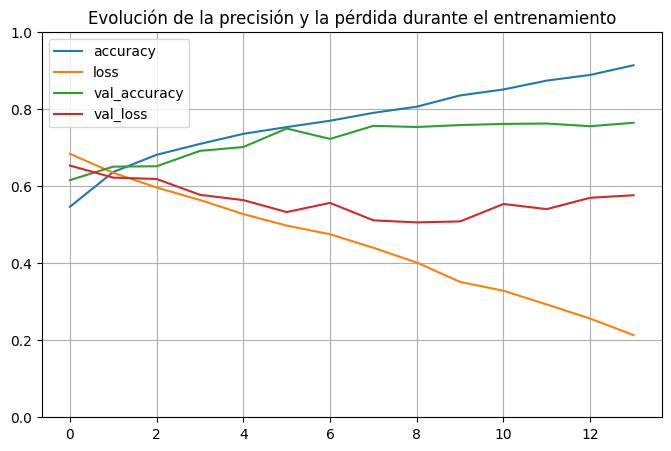

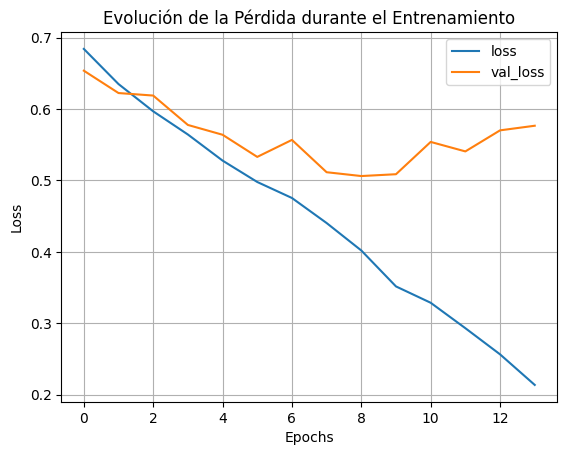

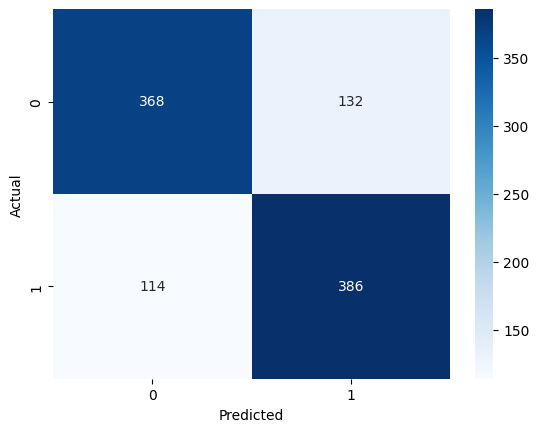

Índices de imágenes difíciles: [571 141 776  27 785 901 255 438 697 508 254 342 421 863 450 224 598 133
 135 494 887 828 473 783]


In [3]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            label = 1 if "dog" in filename.lower() else 0  # Asumiendo nombres tipo "dog_1.jpg"
            img_path = os.path.join(folder, filename)
            img = load_img(img_path, target_size=(32, 32))
            img_array = img_to_array(img) / 255.0  # Normalizar imágenes
            images.append(img_array)
            labels.append(label)
    return np.array(images), np.array(labels)

# Carga de datos de entrenamiento
train_dirs = ["data/github_train_0", "data/github_train_1", "data/github_train_2", "data/github_train_3"]
X_train, y_train = [], []
for directory in train_dirs:
    images, labels = load_images_from_folder(directory)
    X_train.extend(images)
    y_train.extend(labels)

X_train = np.array(X_train)
y_train = np.array(y_train)

# Carga de datos de prueba
X_test, y_test = load_images_from_folder("data/github_test")

# Convertir etiquetas a formato categórico
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

# Definir modelo de red neuronal convolucional
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento con EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, callbacks=[early_stop])

# Evaluación del modelo
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred_classes))

# Graficar el historial de entrenamiento (pérdida y precisión)
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)  # Establecer el rango vertical de [0, 1]
plt.title("Evolución de la precisión y la pérdida durante el entrenamiento")
plt.show()

# Graficar la evolución de la pérdida
history_df = pd.DataFrame(history.history)
history_df[["loss", "val_loss"]].plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Evolución de la Pérdida durante el Entrenamiento")
plt.grid(True)
plt.show()

# Graficar la evolución de la precisión
history_df = pd.DataFrame(history.history)
history_df[["accuracy", "val_accuracy"]].plot()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Evolución de la Precisión durante el Entrenamiento")
plt.grid(True)
plt.show()

# Matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualización de algunas imágenes
def visualize_images(images, labels, predictions=None, num_images=10):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        title = f"Label: {labels[i]}"
        if predictions is not None:
            title += f"\nPred: {predictions[i]}"
        plt.title(title)
        plt.axis('off')
    plt.show()

visualize_images(X_test[:10], y_true[:10], y_pred_classes[:10])

# Selección de imágenes difíciles
misclassified_indices = np.where(y_pred_classes != y_true)[0]
misclassified_confidences = y_pred[misclassified_indices, y_true[misclassified_indices]]
sorted_indices = np.argsort(misclassified_confidences)[-int(len(misclassified_indices) * 0.1):]
difficult_images = misclassified_indices[sorted_indices]

print("Índices de imágenes difíciles:", difficult_images)